# Homework 1

## Apartment Prices

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

Read the data from the CSV file 

In [9]:
local_file_path ="HW2/Booli_sold.csv"
df = pd.read_csv(local_file_path)

Calculate ppsqm 

In [16]:
df['ppsqm']=df['soldPrice']/df['livingArea']

Choose the 5 most expensive apartments by ppsqm 

In [11]:
top_5_exp_apart = df.sort_values(by='ppsqm', ascending=False).head(5)
print("Top 5 most expensive apartments based on ppsqm:")
print(top_5_exp_apart[['location.address.streetAddress', 'soldPrice', 'livingArea', 'ppsqm']])

Top 5 most expensive apartments based on ppsqm:
   location.address.streetAddress  soldPrice  livingArea          ppsqm
67                  Ekhagsvägen 8    2500000        24.0  104166.666667
50                  Ekhagsvägen 8    2450000        24.0  102083.333333
54                 Ekhagsvägen 10    2300000        23.0  100000.000000
34                Torphagsvägen 4    2210000        25.0   88400.000000
55                Docentbacken 1B    2300000        26.9   85501.858736


Calculate the average ppsqm in Ekhagen

In [12]:
average_ppsqm_in_Ekhagen = df['ppsqm'].mean()
print(f"\nThe average ppsqm in Ekhagen is {average_ppsqm_in_Ekhagen}")


The average ppsqm in Ekhagen is 58759.382760081724


Highlighting an interesting aspect of the data: From the table above, we can observe that the most expensive apartments, based on ppsqm, tend to have a small living area. This can be illustrated with the plot below. 

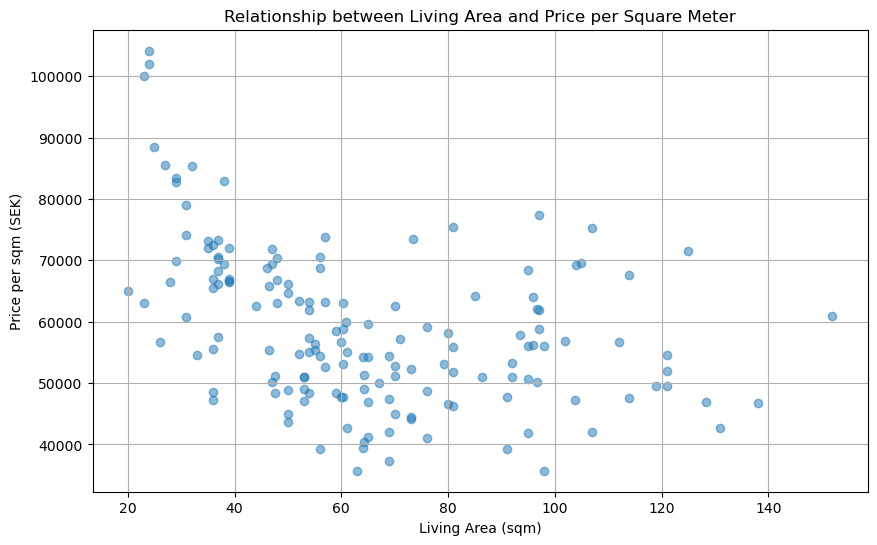

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['livingArea'], df['ppsqm'], alpha=0.5)
plt.xlabel('Living Area (sqm)')
plt.ylabel('Price per sqm (SEK)')
plt.title('Relationship between Living Area and Price per Square Meter')
plt.grid(True)
plt.show()

## The Swedish Election of 2018

Read the CSV file with correct settings, i.e semicolon as separator and comma as decimal

In [24]:
local_file_path = "HW2/2018_R_per_kommun.csv"
df = pd.read_csv(local_file_path, sep=';', decimal=',')
df

,LÄNSKOD,KOMMUNKOD,LÄNSNAMN,KOMMUNNAMN,M,C,L,KD,S,V,...,TRP,VL-S,ÖVR,OGEJ,BLANK,OG,RÖSTER GILTIGA,RÖSTANDE,RÖSTBERÄTTIGADE,VALDELTAGANDE
0,1,14,Stockholms län,Upplands Väsby,23.11,6.26,5.66,6.71,26.97,8.01,...,NaN,NaN,NaN,0.04,0.69,0.06,25830,26036,30740,84.70
1,1,15,Stockholms län,Vallentuna,28.29,10.11,7.73,7.58,18.91,4.47,...,0.0,NaN,0.00,0.02,0.59,0.08,20952,21099,23438,90.02
2,1,17,Stockholms län,Österåker,29.68,9.35,7.48,7.13,19.71,4.97,...,NaN,NaN,0.01,0.03,0.69,0.13,27711,27947,31309,89.26
3,1,20,Stockholms län,Värmdö,27.49,9.76,6.40,5.89,20.48,6.02,...,NaN,NaN,0.01,0.04,0.67,0.07,28115,28335,31371,90.32
4,1,23,Stockholms län,Järfälla,23.96,6.31,6.04,6.29,27.68,8.75,...,0.0,NaN,0.02,0.04,0.53,0.07,45654,45948,53230,86.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,25,80,Norrbottens län,Luleå,15.38,7.53,4.37,4.78,38.97,10.47,...,NaN,NaN,0.01,0.03,0.69,0.04,53182,53589,60185,89.04
286,25,81,Norrbottens län,Piteå,11.82,7.49,2.52,4.80,47.48,10.56,...,NaN,NaN,0.00,0.03,0.61,0.02,29523,29719,33094,89.80
287,25,82,Norrbottens län,Boden,14.32,6.23,3.61,4.61,41.76,8.10,...,NaN,NaN,0.02,0.03,0.84,0.07,19110,19291,21934,87.95
288,25,83,Norrbottens län,Haparanda,12.79,9.61,1.86,5.32,36.69,5.91,...,NaN,NaN,NaN,0.04,1.01,0.11,4402,4454,6120,72.78


Filtering data for Stockholm and calculating the number of legitimate votes in the county

In [26]:
df_for_stockholm = df[df['LÄNSNAMN'] == 'Stockholms län']
legitimate_votes_stockholm = df_for_stockholm['RÖSTER GILTIGA'].sum()
print(f"The total number of legitimate votes in Stockholm County is: {legitimate_votes_stockholm}")

The total number of legitimate votes in Stockholm County is: 1426237


Find the municipality in Sweden where the social democratic party garnered the highest voting percentage

In [28]:
most_votes_s_sweden = df.loc[df['S'].idxmax()]['KOMMUNNAMN']
print(f"The municipality in Sweden where the social democratic party garnered the highest voting percentage is: {most_votes_s_sweden}")

The municipality in Sweden where the social democratic party garnered the highest voting percentage is: Munkfors


Rank the 3 municipialities with highest participation 

In [29]:
high_participation_election = df[['KOMMUNNAMN', 'VALDELTAGANDE']].sort_values(by='VALDELTAGANDE', ascending=False).head(3)
print("Top 3 Municipalities with Highest Participation in Sweden:")
print(high_participation_election)


Top 3 Municipalities with Highest Participation in Sweden:
    KOMMUNNAMN  VALDELTAGANDE
103      Lomma          93.86
59        Habo          93.35
98    Vellinge          93.13


## Predicting Strokes

Let’s look at how age affects the chance of having a stroke. The bar plot below shows the average stroke rates for different age groups.

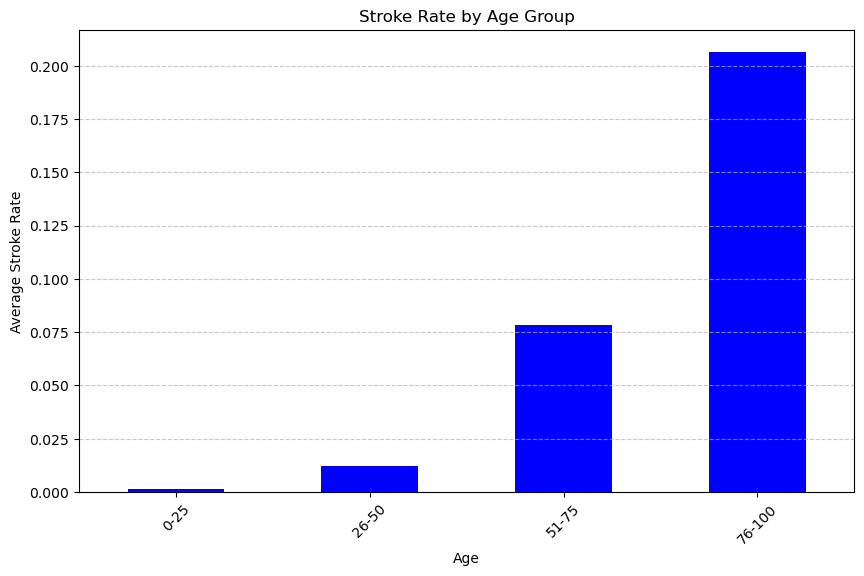

In [43]:
stroke_df = pd.read_csv('HW2/stroke-data.csv')

stroke_df['age_group'] = pd.cut(stroke_df['age'], bins=[0, 25, 50, 75, 100], labels=['0-25', '26-50', '51-75', '76-100'])
stroke_rate_age_group = stroke_df.groupby('age_group', observed=False)['stroke'].mean()

stroke_rate_age_group.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('Age')
plt.ylabel('Average Stroke Rate')
plt.title('Stroke Rate by Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
